<a href="https://colab.research.google.com/github/ashfaqfardin/NLP/blob/main/Introduction_to_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re

# Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [ ]:
imdb_data = tfds.load(name="imdb_reviews", split="train")

In [ ]:
imdb_df = tfds.as_dataframe(imdb_data)

In [ ]:
print(imdb_df.shape)

(25000, 2)


In [ ]:
imdb_df.head()

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


In [ ]:
imdb_df['text'] = imdb_df['text'].str.decode('utf-8')
imdb_df.head()

,label,text
0,0,This was an absolutely terrible movie. Don't b...
1,0,"I have been known to fall asleep during films,..."
2,0,Mann photographs the Alberta Rocky Mountains i...
3,1,This is the kind of film for a snowy Sunday af...
4,1,"As others have mentioned, all the women that g..."


In [ ]:
imdb_df['label'].value_counts()

0    12500
1    12500
Name: label, dtype: int64

In [ ]:
imdb_df['text'][0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [ ]:
imdb_sample = imdb_df.sample(frac=0.2, random_state=100)
imdb_sample.shape

(5000, 2)

In [ ]:
print(imdb_sample.head(10))

       label                                               text
20094      1  "The Godfather" of television, but aside from ...
17218      0  Okay, I've watched this movie twice now, I hav...
3773       0  Okay, so the previews to this film only tells ...
20529      0  Yet ANOTHER movie about a group of less-than-i...
18073      1  This unpretentious Horror film is probably des...
15045      1  updated January 1st, 2006<br /><br />Parsifal ...
17053      0  Although this isn't a "great film," there's so...
23397      1  Cameron Grant is one of the best directors doi...
10531      0  I do not watch much television and came across...
24690      1  As the first of the TV specials offered on the...


In [ ]:
print(imdb_sample.tail(10))

       label                                               text
15026      1  "THINGS TO COME" Movie Review by kWRice<br /><...
7998       0  Slaughter High the tale of revenge by a nerdy ...
4055       0  As a lesbian, I am always on the lookout for f...
23541      0  A movie about dealing with the problems with g...
2214       0  Yes, people are racist. People are even racist...
14369      1  My introduction into Yoji Yamada's cinematic w...
12598      0  True, there are many movies much worse then th...
23487      1  I hadn't laughed this hard for a movie in a re...
18067      1  To call this episode brilliant feels like too ...
8253       0  All of the X-Men movies were great. And I mean...


In [ ]:
imdb_sample['label'].value_counts()

1    2537
0    2463
Name: label, dtype: int64

In [ ]:
print(imdb_sample.isnull().sum())

label    0
text     0
dtype: int64


In [ ]:
imdb_sample['text_length'] = [len(review.split(' ')) for review in imdb_sample['text']]

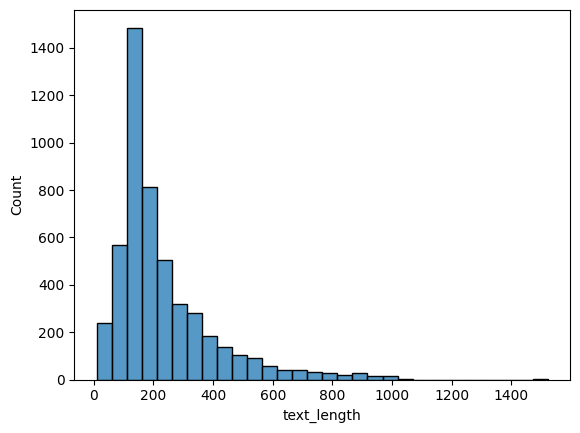

In [ ]:
sns.histplot(data=imdb_sample, x="text_length", bins=30)
plt.xlabel("text_length")
plt.show()

In [ ]:
imdb_sample.groupby('label')['text_length'].median()

label
0    170.0
1    174.0
Name: text_length, dtype: float64

<Axes: xlabel='label'>

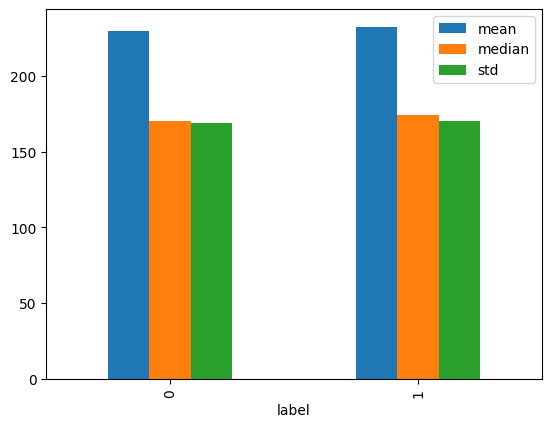

In [ ]:
imdb_sample.groupby('label')['text_length'].agg(['mean', 'median', 'std'])[['mean', 'median', 'std']].plot(kind='bar')

In [ ]:
freq_words = imdb_sample['text'].str.split(expand=True).stack().value_counts()

In [ ]:
freq_words_top100 = freq_words[:100]

In [ ]:
freq_words_top100.describe()

count      100.000000
mean      5268.970000
std       7879.556446
min       1243.000000
25%       1669.750000
50%       2291.000000
75%       5076.000000
max      56231.000000
dtype: float64

In [ ]:
fig = px.treemap(freq_words_top100, path=[freq_words_top100.index], values=0)
fig.update_layout(title_text='Most Frequent 100 Words in the Dataset', uniformtext=dict(minsize=25, mode='show'), title_font=dict(size=20))
fig.show()

In [ ]:
imdb_sample['text'] = imdb_sample['text'].str.lower()

In [ ]:
def punctuation(inputs):
    return re.sub(r'[^\w\s]', ' ', inputs)

In [ ]:
imdb_sample['text'] = imdb_sample['text'].apply(punctuation)

In [ ]:
print(imdb_sample.head(5))

       label                                               text  text_length
20094      1   the godfather  of television  but aside from ...          243
17218      0  okay  i ve watched this movie twice now  i hav...          639
3773       0  okay  so the previews to this film only tells ...          173
20529      0  yet another movie about a group of less than i...          384
18073      1  this unpretentious horror film is probably des...           32


In [ ]:
def tokenization(inputs):
    return word_tokenize(inputs)

In [ ]:
imdb_sample['text_tokenized'] = imdb_sample['text'].apply(tokenization)

In [ ]:
print(imdb_sample['text_tokenized'].head(5))

20094    [the, godfather, of, television, but, aside, f...
17218    [okay, i, ve, watched, this, movie, twice, now...
3773     [okay, so, the, previews, to, this, film, only...
20529    [yet, another, movie, about, a, group, of, les...
18073    [this, unpretentious, horror, film, is, probab...
Name: text_tokenized, dtype: object


In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.add('br')

def stopwords_remove(inputs):
    return [word for word in inputs if word not in stop_words]

In [ ]:
imdb_sample['text_stop'] = imdb_sample['text_tokenized'].apply(stopwords_remove)

In [ ]:
print(imdb_sample['text_stop'].head(5))

20094    [godfather, television, aside, acclaim, mobste...
17218    [okay, watched, movie, twice, researched, heav...
3773     [okay, previews, film, tells, rebellious, youn...
20529    [yet, another, movie, group, less, intelligent...
18073    [unpretentious, horror, film, probably, destin...
Name: text_stop, dtype: object


In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=word, pos='v') for word in inputs]

In [ ]:
imdb_sample['text_lemmatized'] = imdb_sample['text_stop'].apply(lemmatization)

In [ ]:
print(imdb_sample['text_lemmatized'].head(5))

20094    [godfather, television, aside, acclaim, mobste...
17218    [okay, watch, movie, twice, research, heavily,...
3773     [okay, preview, film, tell, rebellious, young,...
20529    [yet, another, movie, group, less, intelligent...
18073    [unpretentious, horror, film, probably, destin...
Name: text_lemmatized, dtype: object


In [ ]:
imdb_sample['final'] = imdb_sample['text_lemmatized'].str.join(' ')

In [ ]:
print(imdb_sample['final'].head(5))

20094    godfather television aside acclaim mobster cha...
17218    okay watch movie twice research heavily net as...
3773     okay preview film tell rebellious young girl g...
20529    yet another movie group less intelligent indiv...
18073    unpretentious horror film probably destine bec...
Name: final, dtype: object


In [ ]:
freq_words_top100 = imdb_sample['final'].str.split(expand=True).stack().value_counts().head(100)

In [ ]:
print(freq_words_top100)

film      9811
movie     8625
not       6174
one       5284
make      4738
          ... 
happen     726
around     722
us         720
may        715
right      715
Length: 100, dtype: int64


In [ ]:
imdb_sample_1 = imdb_sample[imdb_sample['label'] == 1]

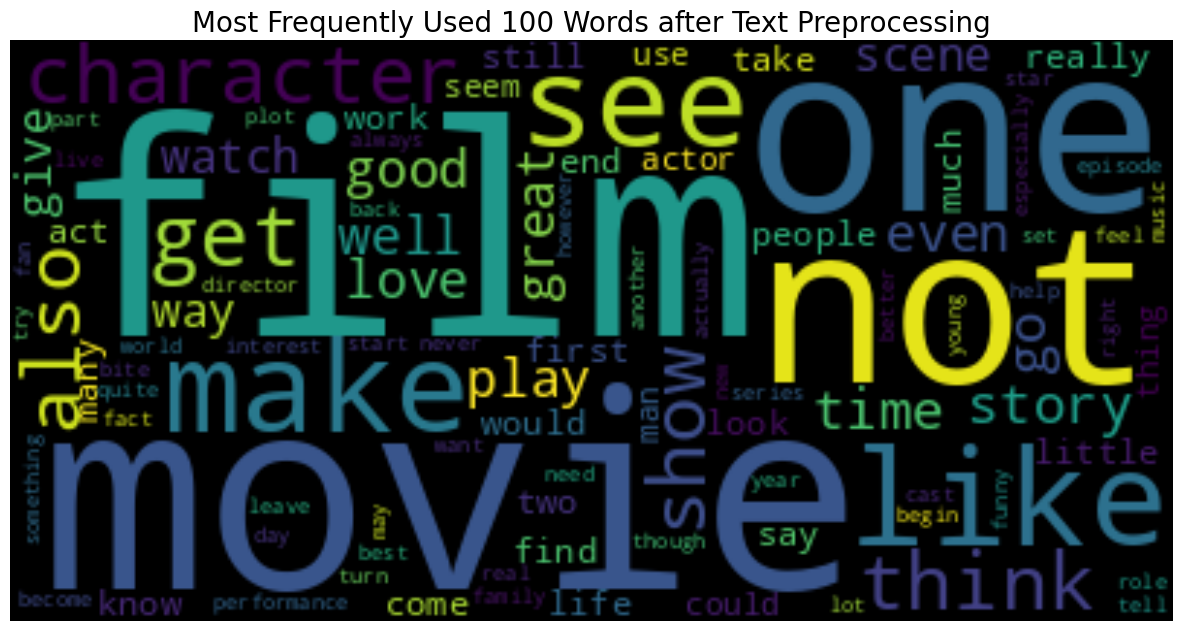

In [ ]:
all_pos_text = ' '.join(imdb_sample_1['final'].tolist())
word_cloud_1 = WordCloud(max_words=100, stopwords=stop_words, random_state=100).generate(all_pos_text)

plt.figure(figsize=(15, 10))
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.title('Most Frequently Used 100 Words after Text Preprocessing', fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
word_cloud_1.words_

{'film': 1.0,
 'movie': 0.855457227138643,
 'one': 0.5977473853580049,
 'not': 0.5376776615714669,
 'like': 0.42451059265218555,
 'make': 0.37865379458299814,
 'see': 0.37168141592920356,
 'get': 0.35746849021185306,
 'character': 0.3228747653526415,
 'think': 0.2965942611960311,
 'show': 0.29632609278626976,
 'also': 0.29257173504961115,
 'story': 0.28506301957629393,
 'go': 0.28372217752748724,
 'time': 0.2759452936444087,
 'well': 0.2609278626977742,
 'play': 0.249396621078037,
 'great': 0.2367927058192545,
 'even': 0.2351836953606865,
 'love': 0.23357468490211852,
 'good': 0.2333065164923572,
 'watch': 0.22606596942880128,
 'scene': 0.21480289621882542,
 'give': 0.2145347278090641,
 'way': 0.21426655939930275,
 'really': 0.21399839098954143,
 'would': 0.21319388576025744,
 'know': 0.2067578439259855,
 'end': 0.2056851702869402,
 'say': 0.19334942343791903,
 'find': 0.19254491820863504,
 'people': 0.18932689729149907,
 'much': 0.18718155001340842,
 'come': 0.18584070796460178,
 'tak

In [ ]:
imdb_sample_0 = imdb_sample[imdb_sample['label'] == 0]

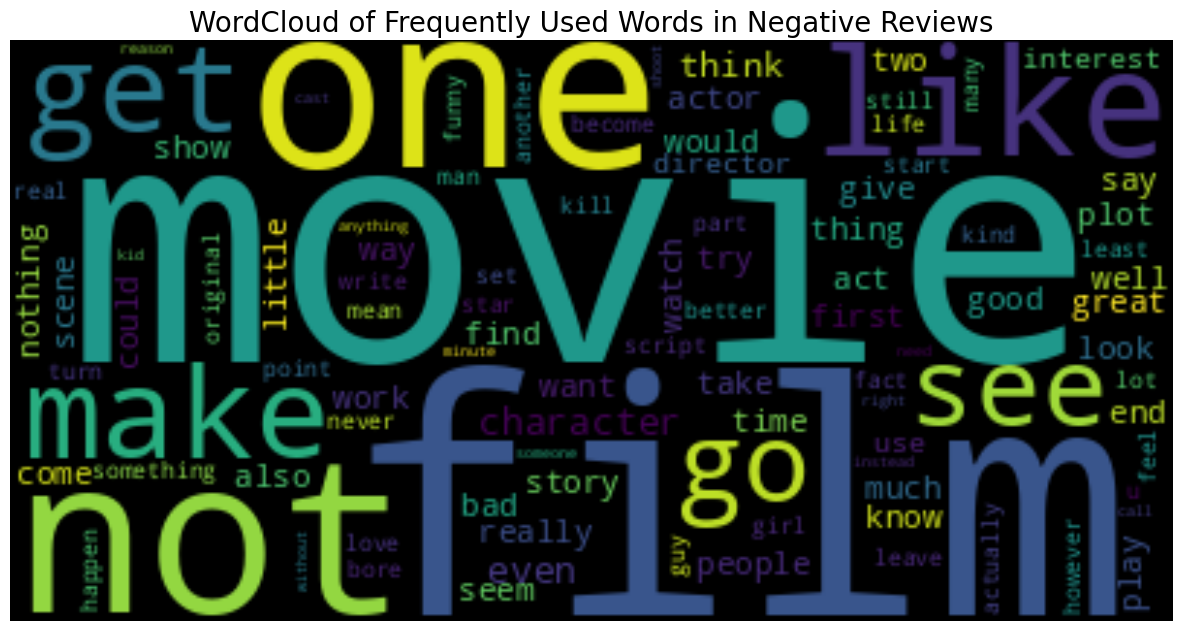

In [ ]:
all_neg_text = ' '.join(imdb_sample_0['final'].tolist())
word_cloud_0 = WordCloud(max_words=100, stopwords=stop_words, random_state=100).generate(all_neg_text)

plt.figure(figsize=(15, 10))
plt.imshow(word_cloud_0, interpolation='bilinear')
plt.title('WordCloud of Frequently Used Words in Negative Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
word_cloud_0.words_

{'movie': 1.0,
 'film': 0.9741041854862993,
 'one': 0.6422764227642277,
 'not': 0.592893706714845,
 'like': 0.4591990364348088,
 'make': 0.4558867810900331,
 'get': 0.4296898524540801,
 'go': 0.3640469738030714,
 'see': 0.35441132189099667,
 'character': 0.347485697079193,
 'even': 0.34718458295694066,
 'think': 0.3182776272207167,
 'time': 0.28425173140620297,
 'watch': 0.2791327913279133,
 'would': 0.2685937970490816,
 'know': 0.26618488407106294,
 'bad': 0.26377597109304424,
 'good': 0.2604637157482686,
 'scene': 0.2598614875037639,
 'say': 0.25745257452574527,
 'really': 0.2399879554351099,
 'story': 0.23848238482384823,
 'end': 0.23517012947907256,
 'show': 0.23396567299006324,
 'way': 0.23246010237880158,
 'people': 0.22794339054501656,
 'well': 0.22433002107798855,
 'act': 0.2204155374887082,
 'look': 0.2186088527551942,
 'give': 0.2122854561878952,
 'plot': 0.21108099969888588,
 'find': 0.21108099969888588,
 'also': 0.20897320084311954,
 'come': 0.2041553748870822,
 'take': 0.2